# Seattle Airbnb Data
https://www.kaggle.com/datasets/airbnb/seattle

## How much ratings depend on prices and availability?

#### Imports

##### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

##### Import Datasets

In [2]:
df_listings = pd.read_csv('./seattle_airbnb_data/listings.csv')
df_listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   
3                                                NaN   
4                                          Belltown    

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   

                                      xl_picture_url   host_id  \
0                                                

In [3]:
df_calendar = pd.read_csv('./seattle_airbnb_data/calendar.csv')
df_calendar.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

##### Select features of interest and merge datasets

In [4]:
df_calendar['price'] = df_calendar['price'].replace(regex=[r'\$', r','], value='').astype('float64')

In [5]:
df_calendar['available'] = pd.get_dummies(df_calendar['available'], drop_first=True)

In [6]:
df_availability = df_calendar.groupby(by = ['listing_id']).sum()
df_availability['price'] = df_availability['price']/df_availability['available']
df_availability

available       price
listing_id                       
3335            309.0  120.000000
4291            365.0   82.000000
5682            309.0   53.944984
6606            365.0   92.849315
7369             53.0   85.000000
...               ...         ...
10332096        365.0   40.000000
10334184        361.0  120.000000
10339144          0.0         NaN
10339145        365.0  237.904110
10340165        358.0   43.000000

[3818 rows x 2 columns]

In [7]:
df = df_listings[['id', 'review_scores_rating']].merge(df_availability, how = 'left', left_on='id', right_on='listing_id')

In [8]:
df.head()

id  review_scores_rating  available        price
0   241032                  95.0      346.0    85.000000
1   953595                  96.0      291.0   170.931271
2  3308979                  97.0      220.0  1301.818182
3  7421966                   NaN      143.0   100.000000
4   278830                  92.0      365.0   462.739726

#### Pre-Processing and Data Quality

##### Check Missing Values

In [9]:
df.isnull().mean()

id                      0.000000
review_scores_rating    0.169460
available               0.000000
price                   0.024882
dtype: float64

##### Remove records with average rating missing

In [10]:
df_rated = df.dropna(subset = ['review_scores_rating'])

##### Transform quantitative columns in categorical

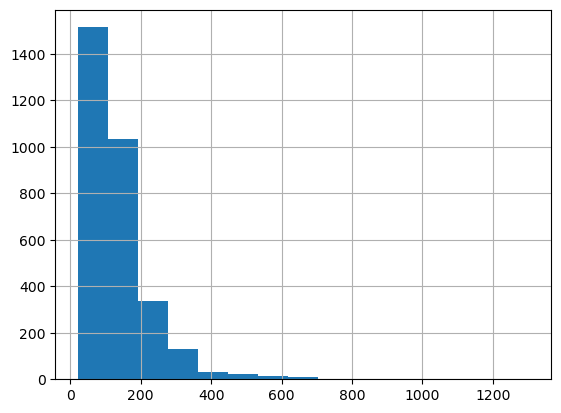

In [78]:
df_rated.price.hist(bins=15);

In [74]:
capped_price = pd.DataFrame({'col1': df_rated['price'], 'col2': [300 for i in df_rated.index]}).min(axis=1)

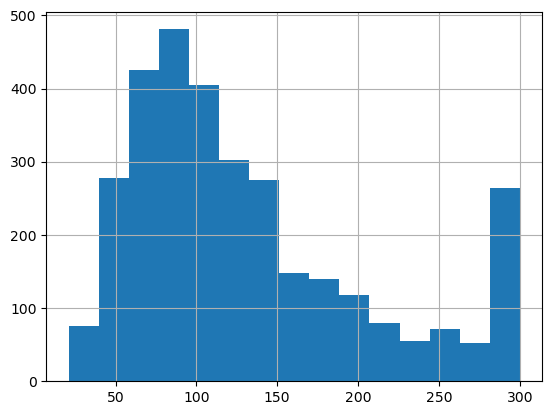

In [77]:
capped_price.hist(bins = 15);

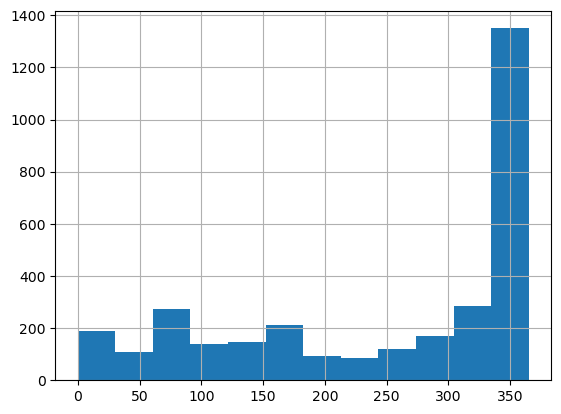

In [76]:
df_rated.available.hist(bins=12);

In [54]:
df_rated['price_tiers'] = pd.DataFrame({'col1': (df_rated['price']//20)*20, 'col2': [300 for i in df_rated.index]}).min(axis=1)

C:\Users\2100\AppData\Local\Temp\ipykernel_15128\601027128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated['price_tiers'] = pd.DataFrame({'col1': (df_rated['price']//20)*20, 'col2': [300 for i in df_rated.index]}).min(axis=1)


In [55]:
df_rated['price_tiers'] = (df_rated['price_tiers'].astype(int).astype(str) + " $").str.zfill(5)

C:\Users\2100\AppData\Local\Temp\ipykernel_15128\2474955071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated['price_tiers'] = (df_rated['price_tiers'].astype(int).astype(str) + " $").str.zfill(5)


In [64]:
df_rated['availability_tiers'] = pd.DataFrame({'col1': df_rated['available']//30*30, 'col2': [360 for i in df_rated.index]}).min(axis=1)

C:\Users\2100\AppData\Local\Temp\ipykernel_15128\1186337729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated['availability_tiers'] = pd.DataFrame({'col1': df_rated['available']//30*30, 'col2': [360 for i in df_rated.index]}).min(axis=1)


In [65]:
df_rated['availability_tiers'] = (df_rated['availability_tiers'].astype(int).astype(str) + " days per year").str.zfill(17)

C:\Users\2100\AppData\Local\Temp\ipykernel_15128\1431809021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated['availability_tiers'] = (df_rated['availability_tiers'].astype(int).astype(str) + " days per year").str.zfill(17)


In [66]:
df_rated

id  review_scores_rating  available        price price_tiers  \
0      241032                  95.0      346.0    85.000000       080 $   
1      953595                  96.0      291.0   170.931271       160 $   
2     3308979                  97.0      220.0  1301.818182       300 $   
4      278830                  92.0      365.0   462.739726       300 $   
5     5956968                  95.0      302.0   125.629139       120 $   
...       ...                   ...        ...          ...         ...   
3810   262764                  92.0      227.0   191.651982       180 $   
3811  8578490                 100.0      221.0    67.782805       060 $   
3812  3383329                  96.0      287.0   102.818815       100 $   
3813  8101950                  80.0       32.0   359.000000       300 $   
3814  8902327                 100.0      273.0   100.201465       100 $   

     availability_tiers  
0     330 days per year  
1     270 days per year  
2     210 days per year  
4     360 days per year  
5     300 days per year  
...                 ...  
3810  210 days per year  
3811  210 days per year  
3812  270 days per year  
3813  030 days per year  
3814  270 days per year  

[3171 rows x 6 columns]

In [67]:
avg_rating_av_and_price = pd.DataFrame()

In [68]:
avg_rating_by_price = df_rated.groupby(['price_tiers'])['review_scores_rating'].mean()
avg_rating_by_price

price_tiers
020 $    93.200000
040 $    94.013115
060 $    94.619780
080 $    94.439394
100 $    94.056410
120 $    94.435737
140 $    94.858333
160 $    94.704142
180 $    94.913043
200 $    94.905263
220 $    95.250000
240 $    94.316456
260 $    95.210526
280 $    94.878788
300 $    95.519149
Name: review_scores_rating, dtype: float64

In [69]:
avg_rating_by_availability = df_rated.groupby(['availability_tiers'])['review_scores_rating'].mean()
avg_rating_by_availability

availability_tiers
000 days per year    93.919355
030 days per year    95.044643
060 days per year    94.479554
090 days per year    95.335878
120 days per year    95.760274
150 days per year    95.228700
180 days per year    93.418605
210 days per year    95.543210
240 days per year    96.258621
270 days per year    94.205479
300 days per year    95.033195
330 days per year    94.943396
360 days per year    93.338255
Name: review_scores_rating, dtype: float64

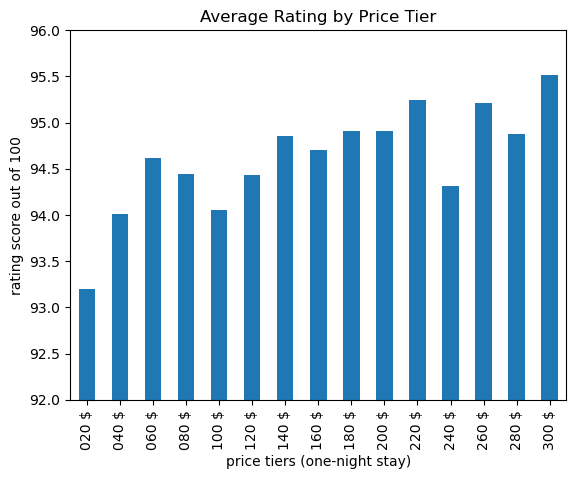

In [82]:
ax = avg_rating_by_price.plot.bar(y = 'review_scores_rating', legend=False)
ax.set_xlabel("price tiers (one-night stay)")
ax.set_ylabel("rating score out of 100")
ax.set_ylim(92,96)
plt.title("Average Rating by Price Tier");

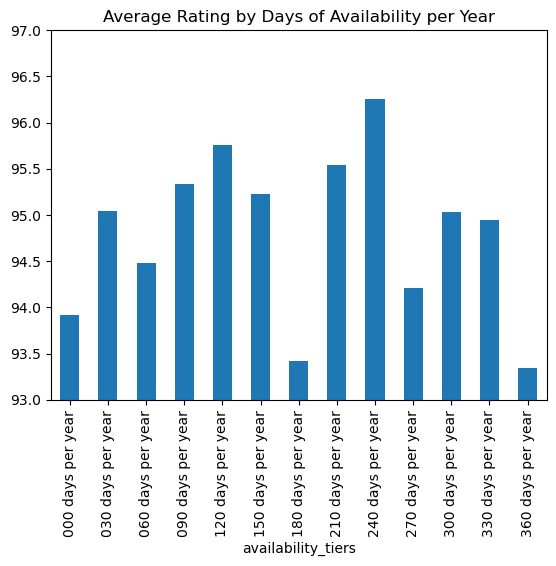

In [80]:
ax = avg_rating_by_availability.plot.bar(y = 'review_scores_rating', legend=False)
ax.set_ylim(93,97)
plt.title("Average Rating by Days of Availability per Year");